# ISS Projekt 2021 - David Chocholatý (xchoch09)

## Uloha 4.1

In [25]:
# Load wav file
import soundfile as sf
data, fs = sf.read('xchoch09.wav')

# Length in samples
print("Length in samples:", data.size, "samples")

# Length in seconds
print("Length in seconds:", data.size / fs, "s")

# Minimum value
print("Minimum value: ", data.min())

# Maximum value
print("Maximum value: ", data.max())

Length in samples: 57959 samples
Length in seconds: 3.6224375 s
Minimum value:  -0.136749267578125
Maximum value:  0.180206298828125


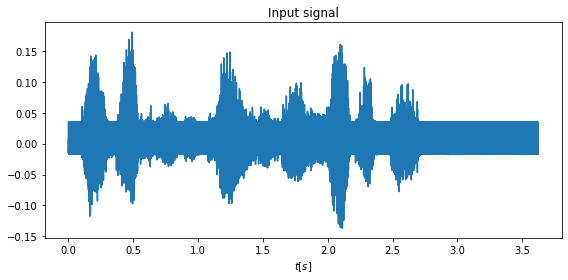

In [26]:
# Plot signal
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(data.size) / fs
plt.figure(figsize=(8,4))
plt.plot(t,data)

plt.gca().set_title('Input signal')
plt.gca().set_xlabel('$t[s]$')

plt.tight_layout()

## Uloha 4.2

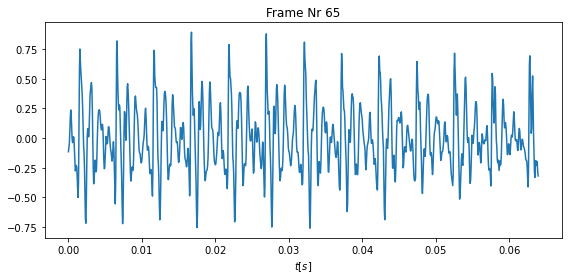

In [27]:
from itertools import zip_longest

# Center input signal
data = data - np.mean(data)

# Normalize signal to range -1, 1
data = data / max(np.max(data), abs(np.min(data)))

# Split signal into frames of size 1024 samples with 512 samples overlap
split_size = 1024
split_step = 512

data_seg = [data[i:i+split_size] for i in range(0, len(data), split_step)]

# Save frames as matrix columns
matrix = list(map(list, zip_longest(*data_seg, fillvalue=None)))

# "Sounded frame" Nr 65 (numbered from 0)
# Save sounded frame from matrix column into numpy array
frame_nr = 65
frame = np.array([])

for i in matrix:  
    frame = np.append(frame, i[frame_nr])    

# Plot frame
t = np.arange(frame.size) / fs
plt.figure(figsize=(8,4))
plt.plot(t,frame)

plt.gca().set_title('Frame Nr 65')
plt.gca().set_xlabel('$t[s]$')

plt.tight_layout()

## Uloha 4.3

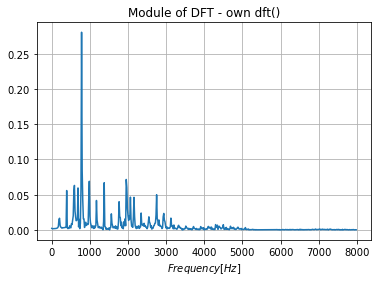

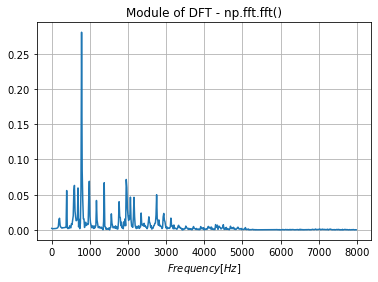

Numpy allclose result:


True

In [28]:
from scipy.fft import fftfreq

####################################
#        Own implementation        #
#   of Discrete Fourier Transform  #
#        (using DFT matrix)        #
####################################

def dft(x):
    # Calculation of N
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    
    # Create DFT matrix W
    n = np.arange(N)
    k = n.reshape((N, 1))
    
    W = np.exp(-2j * np.pi * k * n / N)    
    
    # Dot product of matrix W and vector x
    return np.dot(W, x)

####################################

############################
#  Own DFT implementation  #
############################

frame_spec = dft(frame)
N = frame.size

# Plot module
T = 1.0 / fs
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(frame_spec[0:N//2]))
plt.gca().set_title('Module of DFT - own dft()')
plt.gca().set_xlabel('$Frequency[Hz]$')
plt.grid()
plt.show()

############################

# Pause after plot
plt.pause(0.0001)

############################
#  np FFT implementation   #
############################

frame_spec_np = np.fft.fft(frame)

# Plot module
T = 1.0 / fs
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(frame_spec_np[0:N//2]))
plt.gca().set_title('Module of DFT - np.fft.fft()')
plt.gca().set_xlabel('$Frequency[Hz]$')
plt.grid()
plt.show()

############################

# Pause after plot
plt.pause(0.0001)

# Compare own DFT implementation with numpy FFT
print('Numpy allclose result:')
np.allclose(frame_spec, frame_spec_np)

## Uloha 4.4

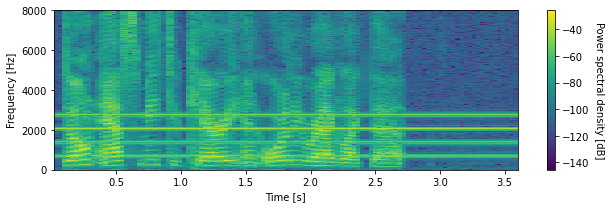

In [29]:
from scipy.signal import spectrogram

f, t, sgr = spectrogram(data, fs, nperseg=1024, noverlap=512)

sgr_log = 10 * np.log10(sgr+1e-20) 

plt.figure(figsize=(9,3))
plt.pcolormesh(t,f,sgr_log)
plt.gca().set_xlabel('Time [s]')
plt.gca().set_ylabel('Frequency [Hz]')
cbar = plt.colorbar()
cbar.set_label('Power spectral density [dB]', rotation=270, labelpad=15)

plt.tight_layout()

## Uloha 4.5

In [30]:
from IPython.display import Image

print('f1: 688 Hz')
print('f2: 688*2 = 1376 Hz')
print('f3: 688*3 = 2064 Hz')
print('f4: 688*4 = 2752 Hz')

Image(url= "iss_45.png")

f1: 688 Hz
f2: 688*2 = 1376 Hz
f3: 688*3 = 2064 Hz
f4: 688*4 = 2752 Hz


## Uloha 4.6

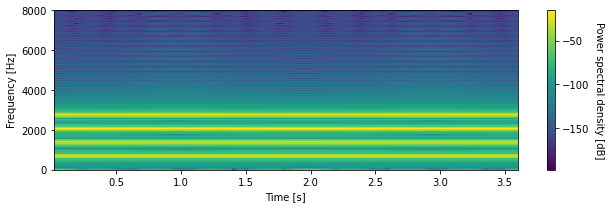

In [31]:
# Generate signal of 4 cosines
f1 = 688
f2 = 1376 # 2*f1
f3 = 2064 # 3*f1
f4 = 2752 # 4*f1

omega_1 = 2 * np.pi * f1
omega_2 = 2 * np.pi * f2
omega_3 = 2 * np.pi * f3
omega_4 = 2 * np.pi * f4

length = data.size / fs

t = np.linspace(0, length, num=data.size)

signal = np.cos(omega_1 * t)
signal += np.cos(omega_2 * t)
signal += np.cos(omega_3 * t)
signal += np.cos(omega_4 * t)

sf.write('audio/4cos.wav', signal, fs, subtype='PCM_16')

# Spectogram
f, t, sgr = spectrogram(signal, fs, nperseg=1024, noverlap=512)

sgr_log = 10 * np.log10(sgr+1e-20) 

plt.figure(figsize=(9,3))
plt.pcolormesh(t,f,sgr_log)
plt.gca().set_xlabel('Time [s]')
plt.gca().set_ylabel('Frequency [Hz]')
cbar = plt.colorbar()
cbar.set_label('Power spectral density [dB]', rotation=270, labelpad=15)

plt.tight_layout()

## Uloha 4.7, 4.8, 4.9, 4.10


--------------------------------------------------------------

Filter for frequency 688 Hz:

--------------------------------------------------------------

b:
[  0.95149545  -7.33596752  25.01591737 -49.26243775  61.2620112
 -49.26243775  25.01591737  -7.33596752   0.95149545]
a:
[  1.          -7.61410876  25.64218391 -49.87017166  61.25091973
 -48.64563526  24.39838961  -7.06689486   0.9053436 ]


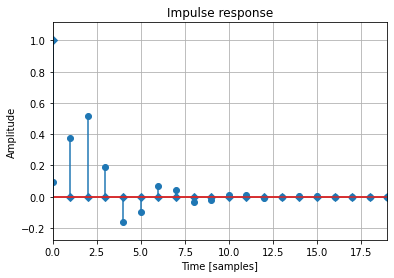

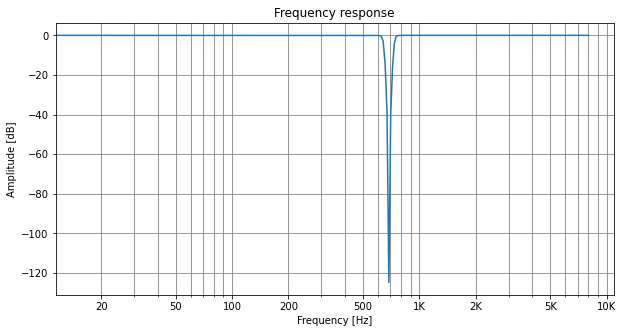

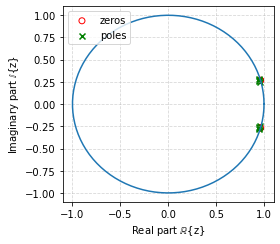


--------------------------------------------------------------

Filter for frequency 1376 Hz:

--------------------------------------------------------------

b:
[  0.95073118  -6.52235025  20.58253088 -38.75271725  47.48987559
 -38.75271725  20.58253088  -6.52235025   0.95073118]
a:
[  1.          -6.77370764  21.10604616 -39.23797219  47.48030971
 -38.25913676  20.06615406  -6.27931841   0.90388978]


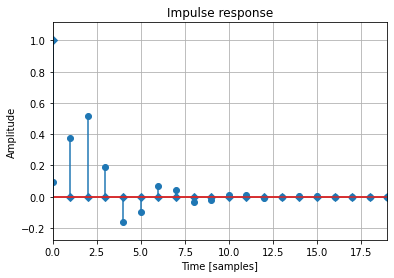

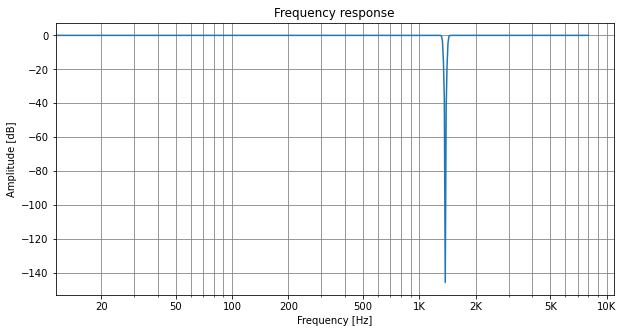

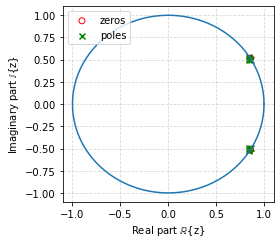


--------------------------------------------------------------

Filter for frequency 2064 Hz:

--------------------------------------------------------------

b:
[  0.95042391  -5.23971291  14.63420061 -25.6724545   30.79710969
 -25.6724545   14.63420061  -5.23971291   0.95042391]
a:
[  1.          -5.44295409  15.00857088 -25.9953517   30.78998471
 -25.34278311  14.26449752  -5.0432459    0.90330562]


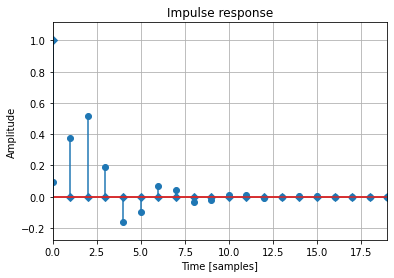

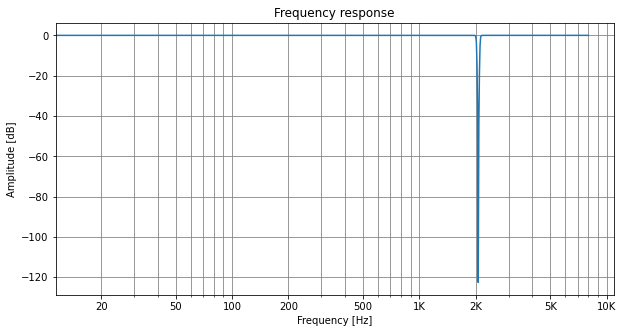

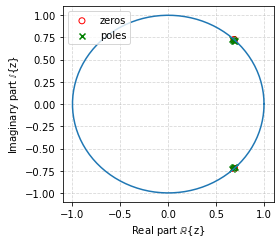


--------------------------------------------------------------

Filter for frequency 2752 Hz:

--------------------------------------------------------------

b:
[  0.9502495   -3.57837489   8.8541841  -13.9066065   16.55430151
 -13.9066065    8.8541841   -3.57837489   0.9502495 ]
a:
[  1.          -3.71768461   9.08117274 -14.08164966  16.54963408
 -13.72690357   8.62938779  -3.44372494   0.90297412]


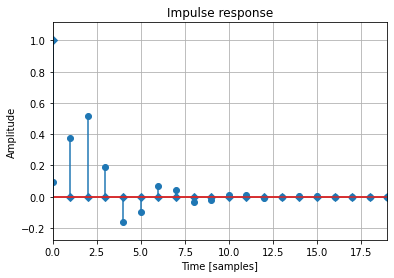

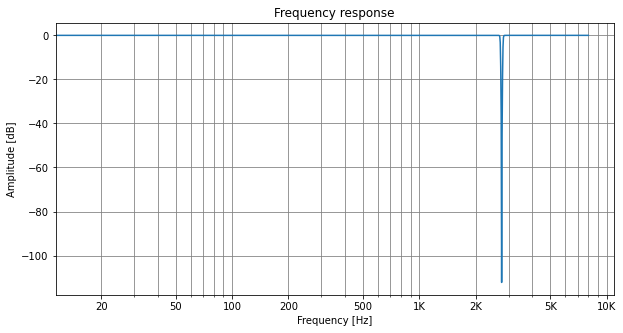

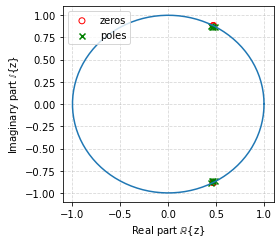


--------------------------------------------------------------

Spectogram for filtered signal:

--------------------------------------------------------------



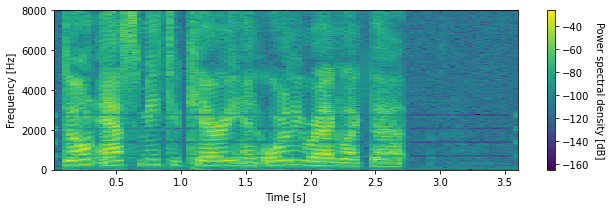


--------------------------------------------------------------

Filtered signal:

--------------------------------------------------------------



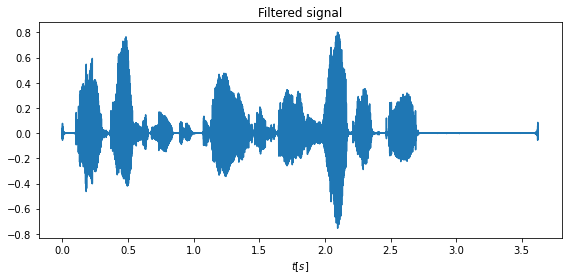

In [32]:
from scipy.signal import buttord, butter, bilinear, freqz, unit_impulse, lfilter, filtfilt
from matplotlib.figure import Figure
from matplotlib import patches, rcParams

def zplane(b,a):    
    # The coefficients are less than 1, normalize the coeficients
    if np.max(b) > 1:
        kn = np.max(b)
        b = b/float(kn)
    else:
        kn = 1

    if np.max(a) > 1:
        kd = np.max(a)
        a = a/float(kd)
    else:
        kd = 1
        
    # Get the poles and zeros
    p = np.roots(a)
    z = np.roots(b)
    k = kn/float(kd)
    
    # Plot
    plt.figure(figsize=(4,3.5))

    # Unit circle
    ang = np.linspace(0, 2*np.pi,100)
    plt.plot(np.cos(ang), np.sin(ang))

    # Zeros and poles
    plt.scatter(np.real(z), np.imag(z), marker='o', facecolors='none', edgecolors='r', label='zeros')
    plt.scatter(np.real(p), np.imag(p), marker='x', color='g', label='poles')

    plt.gca().set_xlabel('Real part $\mathbb{R}\{$z$\}$')
    plt.gca().set_ylabel('Imaginary part $\mathbb{I}\{$z$\}$')

    plt.grid(alpha=0.5, linestyle='--')
    plt.legend(loc='upper left')        

    plt.tight_layout()        
    
    return z, p, k

def print_filter_info(b, a, N):
    ############################
    #    Filter coeficients    #
    ############################
    
    print('b:')
    print(b)
    
    print('a:')
    print(a)


    ############################
    #     Impulse response     #
    ############################    
    
    w, H = freqz(b, a)

    imp = unit_impulse(20)
    c, d = butter(N, 0.5)
    response = lfilter(c, d, imp)

    # Plot
    plt.stem(np.arange(0, 20), imp, markerfmt='D', use_line_collection=True)
    plt.stem(np.arange(0, 20), response, use_line_collection=True)
    plt.margins(0, 0.1)

    plt.xlabel('Time [samples]')
    plt.ylabel('Amplitude')
    plt.title('Impulse response')
    plt.grid(True)
    plt.show()
    
    
    ############################
    #    Frequency response    #
    ############################
    
    x = w * fs * 1.0 / (2 * np.pi)
    y = 20 * np.log10(abs(H))
    plt.figure(figsize=(10,5))
    plt.semilogx(x, y)
    plt.ylabel('Amplitude [dB]')
    plt.xlabel('Frequency [Hz]')
    plt.title('Frequency response')
    plt.grid(which='both', linestyle='-', color='grey')
    plt.xticks([20, 50, 100, 200, 500, 1000, 2000, 5000, 10000], ["20", "50", "100", "200", "500", "1K", "2K", "5K", "10K"])
    plt.show()

    
    ############################
    #     Zeros and poles      #
    ############################
    
    zplane(b, a)
    
    # Pause after last plot in cycle
    plt.pause(0.0001)
    
    
def bandstop_filter(freq):
    ############################
    # Specifications of filter #
    ############################

    # Bandwidth transitions - one side
    t_bw = 50

    # Closing bandwidth - one side
    c_bw = 15

    # Nyquist frequency
    nyq = fs * 0.5

    # Pass band frequency
    wp = [max(freq-t_bw, 0) / nyq, (freq+t_bw) / nyq]

    # Stop band frequency
    ws = [max(freq-c_bw, 0) / nyq, (freq+c_bw) / nyq]

    # Pass band ripple 3 dB
    gpass = 3

    # Stop band attenuation -40 dB
    gstop = 40


    ############################
    #     Design of Filter     #
    ############################

    N, Wn = buttord(wp, ws, gpass, gstop)

    b, a = butter(N, Wn, 'bandstop')    
    
    ############################
    #       Filter info        #
    ############################
    
    print_filter_info(b, a, N)
    
    return b, a


############################################################

############################
#        Filtering         #
############################

# Filter signal
for i in range(1, 5):
    freq_val = eval('f' + str(i))
    
    print('\n--------------------------------------------------------------\n')
    print('Filter for frequency ' + str(freq_val) + ' Hz:')
    print('\n--------------------------------------------------------------\n')    
    
    b, a = bandstop_filter(freq_val)
    data = filtfilt(b, a, data)        
    
    
############################
#        Spectogram        #
############################
    
print('\n--------------------------------------------------------------\n')
print('Spectogram for filtered signal:')
print('\n--------------------------------------------------------------\n')    

# Plot spectogram
f, t, sgr = spectrogram(data, fs, nperseg=1024, noverlap=512)

sgr_log = 10 * np.log10(sgr+1e-20) 

plt.figure(figsize=(9,3))
plt.pcolormesh(t,f,sgr_log)
plt.gca().set_xlabel('Time [s]')
plt.gca().set_ylabel('Frequency [Hz]')
cbar = plt.colorbar()
cbar.set_label('Power spectral density [dB]', rotation=270, labelpad=15)

plt.tight_layout()

# Pause after plot
plt.pause(0.0001)


############################
#     Filtered signal      #
############################

print('\n--------------------------------------------------------------\n')
print('Filtered signal:')
print('\n--------------------------------------------------------------\n')

# Plot signal
t = np.arange(data.size) / fs
plt.figure(figsize=(8,4))
plt.plot(t,data)

plt.gca().set_title('Filtered signal')
plt.gca().set_xlabel('$t[s]$')

plt.tight_layout()


############################
#  Saving filtered signal  #
############################

# Normalize signal to range -1, 1
data = data / max(data.max(), abs(data.min()))
    
# Save filtered signal to wav file
sf.write('audio/clean_bandstop.wav', data, fs, subtype='PCM_16')
